In [15]:
%matplotlib notebook

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
games_df = pd.read_csv("Games_df.csv")

In [18]:
games_df.dtypes

Unnamed: 0                      int64
Game Title                     object
Game Category                  object
Game Score                    float64
Number of Reviews               int64
Price                         float64
Number of Installs              int64
Developer                      object
Play Store URL                 object
Total Download Revenue ($)    float64
dtype: object

In [8]:
games_df = games_df.rename(columns={"Total Download Revenue ($)":"Revenue","Number of Installs":"Installs"})

In [9]:
#sorting all 425 results by total revenue.
top_games = games_df.sort_values(by='Revenue', ascending=False)

In [10]:
#extract top 25 games according to their revenue from df
top_games = top_games['Revenue'].nlargest(25).to_frame()
top_games = games_df.loc[top_games.index]

In [ ]:
#show top_games data through a bar chart/ version 1
tick_location = np.arange(len(top_games))
rev1 = plt.bar(tick_location,top_games["Revenue"], align="center", color="tab:blue",label="revenue")
rev2 = plt.bar(tick_location,top_games["Installs"], align="center",color="orange",label="total download")
plt.xticks(tick_location,top_games["Game Title"], rotation=90)
plt.xticks()

plt.xlim(-1, len(top_games))
plt.title("Revenues Generated from Top 25 Paid Games")
plt.ylim(0,max(top_games["Revenue"]+5000000))
plt.ylabel("Total Download Revenue (10 million)")

plt.tight_layout()
plt.legend()
plt.savefig("top_paid_games.png")

In [20]:
#showing the data with a scatter plot

arcade = top_games.loc[top_games["Game Category"]=="GAME_ARCADE"]
sports = top_games.loc[top_games["Game Category"]=="GAME_SPORTS"]
racing = top_games.loc[top_games["Game Category"]=="GAME_RACING"]
music = top_games.loc[top_games["Game Category"]=="GAME_MUSIC"]
educational = top_games.loc[top_games["Game Category"]== "GAME_EDUCATIONAL"]
board = top_games.loc[top_games["Game Category"]=="GAME_BOARD"]
casino = top_games.loc[top_games["Game Category"]=="GAME_CASINO"]
action = top_games.loc[top_games["Game Category"]=="GAME_ACTION"]
trivia = top_games.loc[top_games["Game Category"]=="GAME_TRIVIA"]
simulation = top_games.loc[top_games["Game Category"]=="GAME_SIMULATION"]
adventure = top_games.loc[top_games["Game Category"]=="GAME_ADVENTURE"]
puzzle = top_games.loc[top_games["Game Category"]=="GAME_PUZZLE"]
card = top_games.loc[top_games["Game Category"]=="GAME_CARD"]
casual = top_games.loc[top_games["Game Category"]=="GAME_CASUAL"]
strategy = top_games.loc[top_games["Game Category"]=="GAME_STRATEGY"]                       
roleplay = top_games.loc[top_games["Game Category"]=="GAME_ROLE_PLAYING"]
word = top_games.loc[top_games["Game Category"]=="GAME_WORD"]

In [ ]:
#building scatter plots for each category
arcade_p = plt.scatter(arcade["Installs"], arcade["Price"], marker="o"
                       , label="Arcade Games", color="red", alpha=0.75)
sports_p = plt.scatter(sports["Installs"], sports["Price"], marker="o",
                        label="Sports Games", color="blue", alpha=0.75)
racing_p = plt.scatter(racing["Installs"], racing["Price"], marker="o",
                        label="Racing Games", color="yellow", alpha=0.75)
music_p = plt.scatter(music["Installs"], music["Price"], marker="o",
                        label="Music Games", color="green", alpha=0.75)
educational_p = plt.scatter(educational["Installs"], educational["Price"],
                            marker="o",label="Educational Games", color="darkgreen", alpha=0.75)
board_p = plt.scatter(board["Installs"], board["Price"], marker="o",
                       label="Board Games", color="lightblue", alpha=0.75)
casino_p = plt.scatter(casino["Installs"], casino["Price"], marker="o",
                       label="Casino Games", color="pink", alpha=0.75)
action_p = plt.scatter(action["Installs"], action["Price"], marker="o",
                       label="Action Games", color="hotpink", alpha=0.75)
trivia_p = plt.scatter(trivia["Installs"], trivia["Price"], marker="o",
                       label="Trivia Games", color="grey", alpha=0.75)
simulation_p = plt.scatter(simulation["Installs"], simulation["Price"], marker="o",
                       label="Simulation Games", color="black", alpha=0.75)
adventure_p = plt.scatter(adventure["Installs"], adventure["Price"], marker="o",
                       label="Adenture Games", color="purple", alpha=0.75)
puzzle_p = plt.scatter(puzzle["Installs"], puzzle["Price"], marker="o",
                        label="Puzzle Games", color="white", edgecolor="black",alpha=0.75)
card_p = plt.scatter(card["Installs"], card["Price"], marker="o",
                       label="Card Games", color="orange", alpha=0.75)
casual_p = plt.scatter(casual["Installs"], casual["Price"], marker="o",
                       label="Casual Games", color="blue",edgecolor="red", alpha=0.75)
strategy_p = plt.scatter(strategy["Installs"], strategy["Price"], marker="o",
                       label="Strategic Games", color="green", edgecolor="lightblue", alpha=0.75)
roleplay_p = plt.scatter(roleplay["Installs"], roleplay["Price"], marker="o",
                       label="Roleplay Games", color="yellow", edgecolor="purple", alpha=0.75)
word_p = plt.scatter(word["Installs"], word["Price"], marker="o",
                       label="Word Games", color="skyblue", alpha=0.75)

#labeling the graph
plt.xlabel("Installs")
plt.ylabel("Price/App")
plt.title("Price vs. Install")
#plt.legend((arcade_p,sports_p,racing_p,music_p,educational_p,board_p,casino_p,action_p,trivia_p,simulation_p,
           #adventure_p,puzzle_p,card_p,casual_p,strategy_p,roleplay_p,word_p),
           #("Arcade","Sports","Racing","Music","Education","Board","Casino","Action","Trivia","Simulation",
           #"Adventure","Puzzle","Card","Casual","Strategic","Roleplay","Word"))
plt.legend(loc="best", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("PriceInstall.png")

<IPython.core.display.Javascript object>


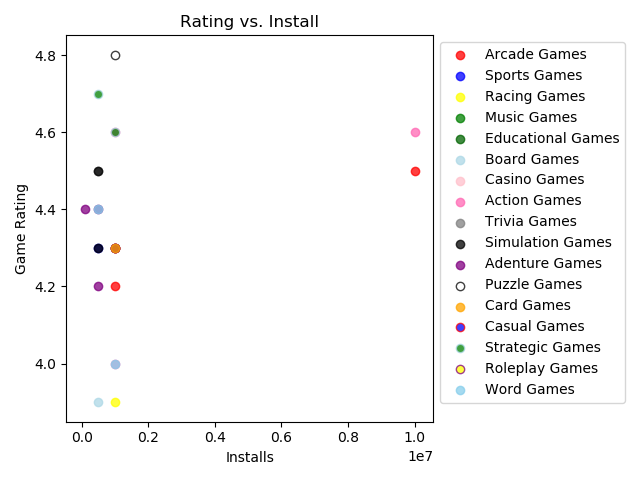

In [22]:
#building scatter plots for each category
arcade_p = plt.scatter(arcade["Installs"], arcade["Game Score"], marker="o"
                       , label="Arcade Games", color="red", alpha=0.75)
sports_p = plt.scatter(sports["Installs"], sports["Game Score"], marker="o",
                        label="Sports Games", color="blue", alpha=0.75)
racing_p = plt.scatter(racing["Installs"], racing["Game Score"], marker="o",
                        label="Racing Games", color="yellow", alpha=0.75)
music_p = plt.scatter(music["Installs"], music["Game Score"], marker="o",
                        label="Music Games", color="green", alpha=0.75)
educational_p = plt.scatter(educational["Installs"], educational["Game Score"],
                            marker="o",label="Educational Games", color="darkgreen", alpha=0.75)
board_p = plt.scatter(board["Installs"], board["Game Score"], marker="o",
                       label="Board Games", color="lightblue", alpha=0.75)
casino_p = plt.scatter(casino["Installs"], casino["Game Score"], marker="o",
                       label="Casino Games", color="pink", alpha=0.75)
action_p = plt.scatter(action["Installs"], action["Game Score"], marker="o",
                       label="Action Games", color="hotpink", alpha=0.75)
trivia_p = plt.scatter(trivia["Installs"], trivia["Game Score"], marker="o",
                       label="Trivia Games", color="grey", alpha=0.75)
simulation_p = plt.scatter(simulation["Installs"], simulation["Game Score"], marker="o",
                       label="Simulation Games", color="black", alpha=0.75)
adventure_p = plt.scatter(adventure["Installs"], adventure["Game Score"], marker="o",
                       label="Adenture Games", color="purple", alpha=0.75)
puzzle_p = plt.scatter(puzzle["Installs"], puzzle["Game Score"], marker="o",
                        label="Puzzle Games", color="white", edgecolor="black",alpha=0.75)
card_p = plt.scatter(card["Installs"], card["Game Score"], marker="o",
                       label="Card Games", color="orange", alpha=0.75)
casual_p = plt.scatter(casual["Installs"], casual["Game Score"], marker="o",
                       label="Casual Games", color="blue",edgecolor="red", alpha=0.75)
strategy_p = plt.scatter(strategy["Installs"], strategy["Game Score"], marker="o",
                       label="Strategic Games", color="green", edgecolor="lightblue", alpha=0.75)
roleplay_p = plt.scatter(roleplay["Installs"], roleplay["Game Score"], marker="o",
                       label="Roleplay Games", color="yellow", edgecolor="purple", alpha=0.75)
word_p = plt.scatter(word["Installs"], word["Game Score"], marker="o",
                       label="Word Games", color="skyblue", alpha=0.75)

#labeling the graph
plt.xlabel("Installs")
plt.ylabel("Game Rating")
plt.title("Rating vs. Install")
#plt.legend((arcade_p,sports_p,racing_p,music_p,educational_p,board_p,casino_p,action_p,trivia_p,simulation_p,
           #adventure_p,puzzle_p,card_p,casual_p,strategy_p,roleplay_p,word_p),
           #("Arcade","Sports","Racing","Music","Education","Board","Casino","Action","Trivia","Simulation",
           #"Adventure","Puzzle","Card","Casual","Strategic","Roleplay","Word"))
plt.legend(loc="best", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("RatingInstall.png")